In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



In [135]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Predicitive%20Modelling/midterm_parttwo.csv")

In [136]:
df.head()

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
0,1,Low,No dependent,Very low,Very low,Married,Positive
1,2,Low,No dependent,Very low,Very low,Single,Positive
2,1,Low,No dependent,Very low,Very low,Single,Positive
3,3,Low,No dependent,Very low,Very low,Married,Positive
4,3,Low,No dependent,Very low,Very low,Single,Negative


In [137]:
df.isna().any()

Years of Education after High School    False
Requested Credit Amount                 False
Number of Dependents                    False
Monthly Income                          False
Monthly Expense                         False
Marital Status                          False
Credit Rating                           False
dtype: bool

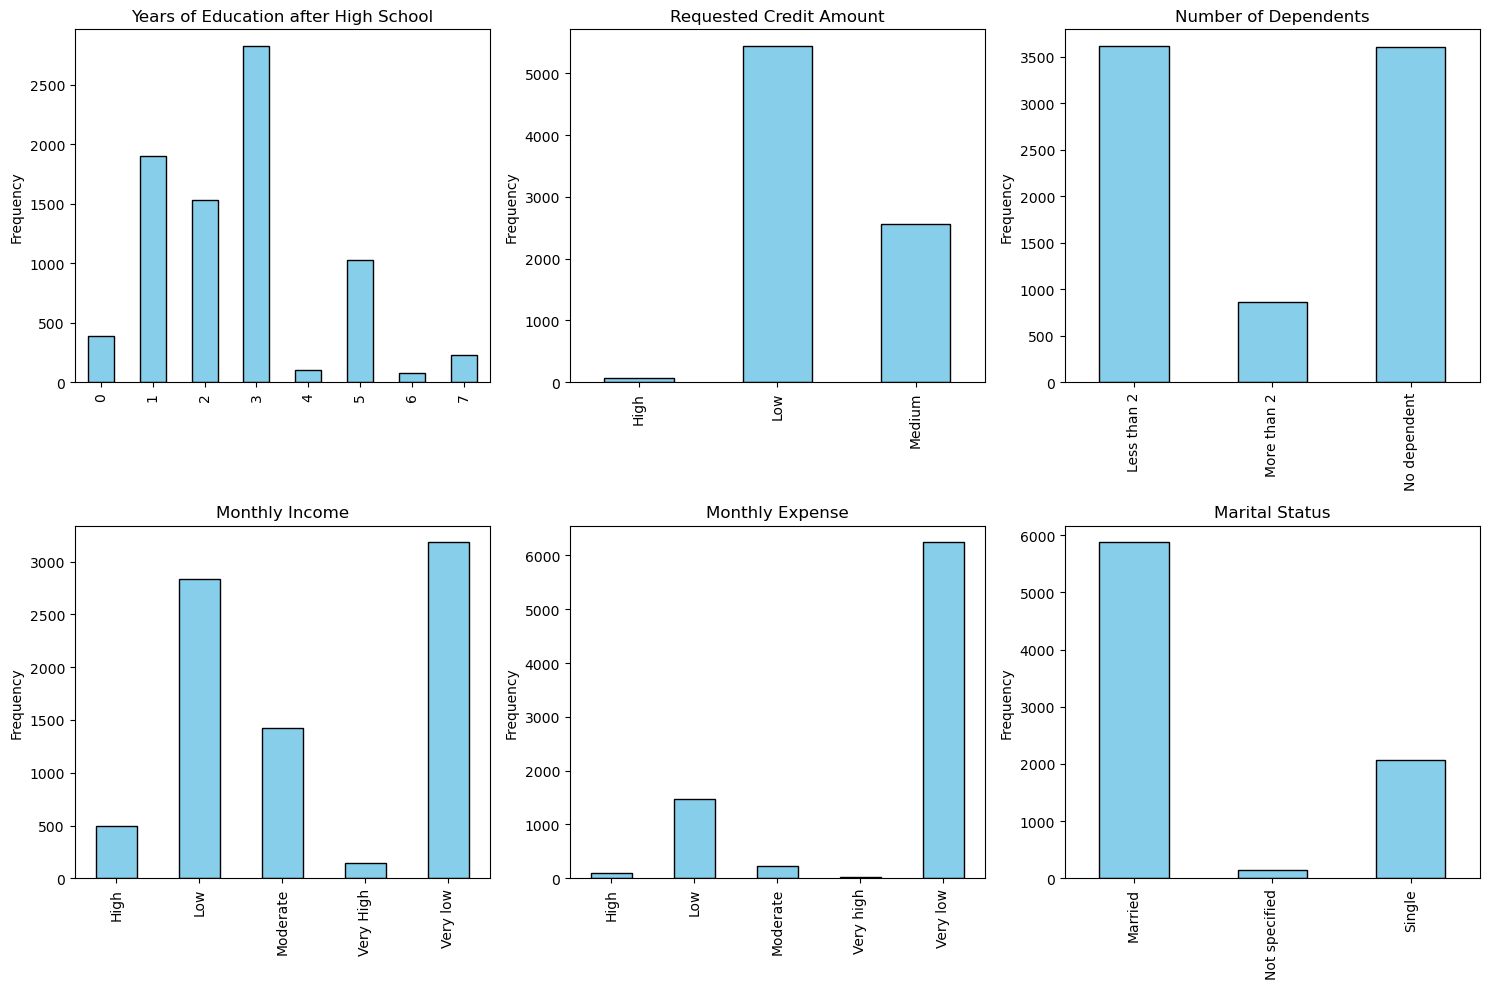

In [138]:
# Plotting histograms for each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each categorical column and plot a bar plot
for i, col in enumerate(['Years of Education after High School', 'Requested Credit Amount', 'Number of Dependents', 'Monthly Income', 'Monthly Expense', 'Marital Status']):
    df[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

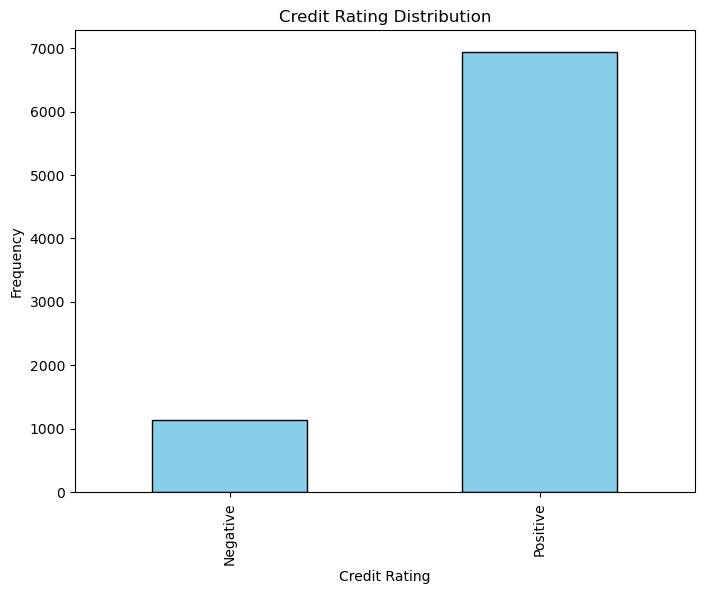

In [139]:
fig, ax = plt.subplots(figsize=(8, 6))

# Count the occurrences of each unique value in 'Credit Rating'
credit_rating_counts = df['Credit Rating'].value_counts().sort_index()

# Plotting the bar plot
credit_rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_title('Credit Rating Distribution')
ax.set_xlabel('Credit Rating')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()

In [140]:
credit_rating_proportion = df['Credit Rating'].value_counts(normalize=True)

# Print the proportions
print("Proportion of Credit Rating being Negative:", credit_rating_proportion[0])
print("Proportion of Credit Rating being Positive:", credit_rating_proportion[1])


Proportion of Credit Rating being Negative: 0.858185868085633
Proportion of Credit Rating being Positive: 0.14181413191436704


In [141]:
for col in df.columns:
    unique_values = df[col].unique()
    
    print(f"{col}: {unique_values}")


Years of Education after High School: [1 2 3 7 4 5 0 6]
Requested Credit Amount: ['Low' 'Medium' 'High']
Number of Dependents: ['No dependent' 'Less than 2' 'More than 2']
Monthly Income: ['Very low' 'Low' 'Moderate' 'High' 'Very High']
Monthly Expense: ['Very low' 'Low' 'Moderate' 'High' 'Very high']
Marital Status: ['Married' 'Single' 'Not specified']
Credit Rating: ['Positive' 'Negative']


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Years of Education after High School  8081 non-null   int64 
 1   Requested Credit Amount               8081 non-null   object
 2   Number of Dependents                  8081 non-null   object
 3   Monthly Income                        8081 non-null   object
 4   Monthly Expense                       8081 non-null   object
 5   Marital Status                        8081 non-null   object
 6   Credit Rating                         8081 non-null   object
dtypes: int64(1), object(6)
memory usage: 442.1+ KB


Initial Performance

In [143]:
# Step 2: Split the Dataset
train_set, test_set = train_test_split(df, test_size=0.5, random_state=42)



In [144]:
features = ["Requested Credit Amount", "Marital Status", "Number of Dependents", "Years of Education after High School", "Monthly Income", "Monthly Expense"]
X_train = pd.get_dummies(train_set[features])
y_train = train_set["Credit Rating"]

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [145]:
X_test = pd.get_dummies(test_set[features])
y_test = test_set["Credit Rating"]

In [146]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')

tn, fp, fn, tp = conf_matrix.ravel()

print("Confusion Matrix:")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print("\nOther Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
True Positive (TP): 3464
True Negative (TN): 0
False Positive (FP): 577
False Negative (FN): 0

Other Metrics:
Precision: 0.8572135609997525
Recall: 1.0
F1 Score: 0.9231179213857428


In [150]:
y_prob = model.predict_proba(X_test)[:, 1]
threshold_15_percent = pd.Series(y_prob).quantile(0.85)
y_pred_threshold = ['Positive' if prob > threshold_15_percent else 'Negative' for prob in y_prob]


In [151]:
print("\nThreshold for 15% Approval:", threshold_15_percent)



Threshold for 15% Approval: 0.887512679174168


In [152]:
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold, pos_label='Positive')
recall_threshold = recall_score(y_test, y_pred_threshold, pos_label='Positive')
f1_threshold = f1_score(y_test, y_pred_threshold, pos_label='Positive')

tn, fp, fn, tp = conf_matrix_threshold.ravel()

print("Confusion Matrix (Thresholded):")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print("\nMetrics (Thresholded):")
print("Precision:", precision_threshold)
print("Recall:", recall_threshold)
print("F1 Score:", f1_threshold)

Confusion Matrix (Thresholded):
True Positive (TP): 525
True Negative (TN): 496
False Positive (FP): 81
False Negative (FN): 2939

Metrics (Thresholded):
Precision: 0.8663366336633663
Recall: 0.15155889145496534
F1 Score: 0.25798525798525795


Class Weight is Balanced

In [153]:
# Step 2: Split the Dataset
train_set, test_set = train_test_split(df, test_size=0.5, random_state=42)



In [154]:
features = ["Requested Credit Amount", "Marital Status", "Number of Dependents", "Years of Education after High School", "Monthly Income", "Monthly Expense"]
X_train = pd.get_dummies(train_set[features])
y_train = train_set["Credit Rating"]

model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [155]:
X_test = pd.get_dummies(test_set[features])
y_test = test_set["Credit Rating"]

In [156]:
y_pred_weighted = model_weighted.predict(X_test)

conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted, pos_label='Positive')
recall_weighted = recall_score(y_test, y_pred_weighted, pos_label='Positive')
f1_weighted = f1_score(y_test, y_pred_weighted, pos_label='Positive')

tn, fp, fn, tp = conf_matrix_weighted.ravel()

print("Confusion Matrix (Weighted):")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print("\nMetrics (Weighted):")
print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 Score:", f1_weighted)

Confusion Matrix (Weighted):
True Positive (TP): 1902
True Negative (TN): 306
False Positive (FP): 271
False Negative (FN): 1562

Metrics (Weighted):
Precision: 0.8752876208007363
Recall: 0.5490762124711316
F1 Score: 0.6748270356572644


In [158]:
y_prob_weighted = model_weighted.predict_proba(X_test)[:, 1]
threshold_15_percent_weighted = pd.Series(y_prob_weighted).quantile(0.85)
y_pred_threshold_weighted = ['Positive' if prob > threshold_15_percent_weighted else 'Negative' for prob in y_prob_weighted]



In [159]:
print("\nThreshold for 15% Approval (Weighted):", threshold_15_percent_weighted)



Threshold for 15% Approval (Weighted): 0.5697612660340932


In [160]:
conf_matrix_threshold_weighted = confusion_matrix(y_test, y_pred_threshold_weighted)
precision_threshold_weighted = precision_score(y_test, y_pred_threshold_weighted, pos_label='Positive')
recall_threshold_weighted = recall_score(y_test, y_pred_threshold_weighted, pos_label='Positive')
f1_threshold_weighted = f1_score(y_test, y_pred_threshold_weighted, pos_label='Positive')

tn, fp, fn, tp = conf_matrix_threshold_weighted.ravel()

print("Confusion Matrix (Thresholded - Weighted):")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print("\nMetrics (Thresholded - Weighted):")
print("Precision:", precision_threshold_weighted)
print("Recall:", recall_threshold_weighted)
print("F1 Score:", f1_threshold_weighted)

Confusion Matrix (Thresholded - Weighted):
True Positive (TP): 495
True Negative (TN): 503
False Positive (FP): 74
False Negative (FN): 2969

Metrics (Thresholded - Weighted):
Precision: 0.8699472759226714
Recall: 0.14289838337182448
F1 Score: 0.24547483263079595
